# Aim:  Identify target customers segments by using market basket analysis techniques

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Import the data
mc = pd.read_csv("Mall_Customers.csv")

# top 5 records of dataframe
mc.head()  

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [3]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
mc.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [4]:
mc.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
mc.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

Female    112
Male       88
Name: Gender, dtype: int64


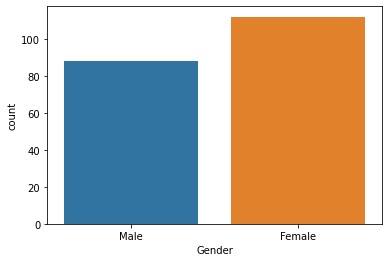

In [6]:
#number of male and female
print(mc.Gender.value_counts())
sns.countplot(data=mc, x='Gender');

<AxesSubplot:>

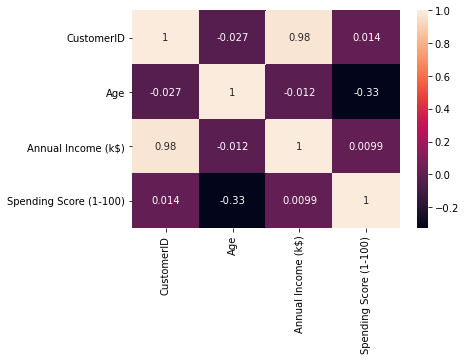

In [7]:
#Correlation between variables
sns.heatmap(mc.corr(), annot=True)

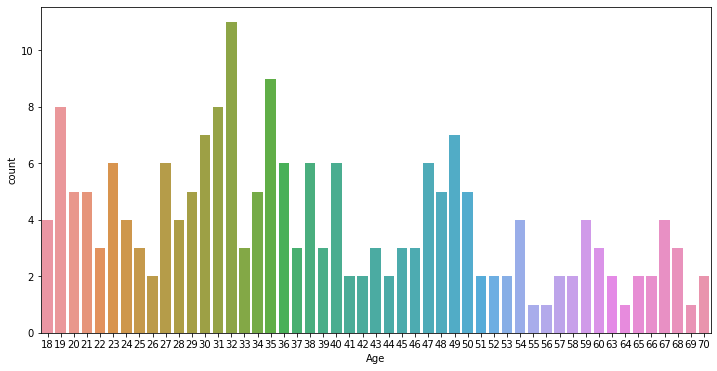

In [8]:
#display number of age groups that shop the most
plt.figure(figsize=(12,6))
sns.countplot(data=mc, x='Age');

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

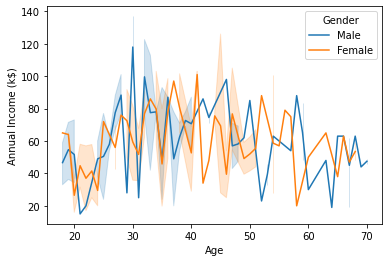

In [9]:
#Display which gender and age group has high income
sns.lineplot(data=mc, x="Age", y="Annual Income (k$)", hue="Gender")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

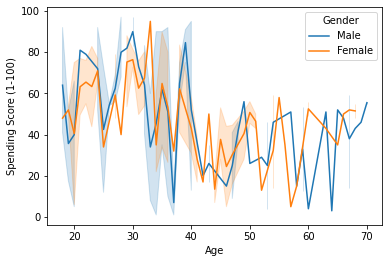

In [10]:
# Display of age and gender that spend the most
sns.lineplot(data=mc, x="Age", y="Spending Score (1-100)", hue="Gender")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

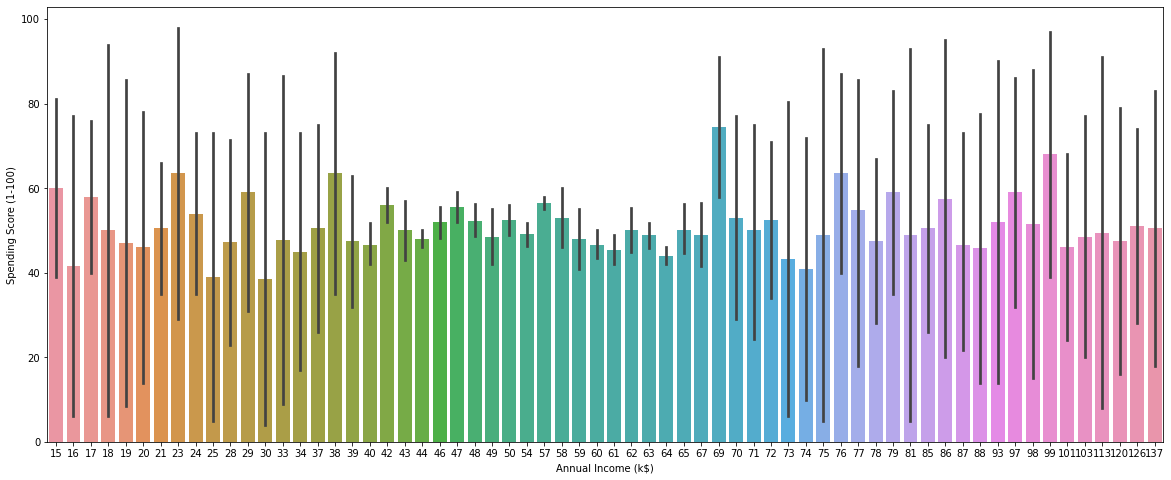

In [11]:
#Display relationship between income and spending score
plt.figure(figsize=(20,8))
sns.barplot(data=mc, x='Annual Income (k$)',y='Spending Score (1-100)')

**Data Preperation**

In [13]:
#Predictor Attributes
X=mc.iloc[:, [3,4]].values

# Build K-means Model

**using elbow method**

In [14]:
# import kMean from sklean
from sklearn.cluster import KMeans

In [15]:
# plot elbow method graph
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show

# k value = 5

C:\Users\ruffi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

In [16]:
# applying the cluster method
# k value = 5
kmeans = KMeans(n_clusters= 5, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [17]:
# predict the cluster
y_kmeans = kmeans.fit_predict(X)

In [18]:
# print the centroids points
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [19]:
# Visualizing the five Clusters - K-means
plt.figure(figsize = (8,5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label = 'Sensible')

# apply centroid for all cluster
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1] , s=200, c='yellow', label = 'Centroids')

plt.title('Cluster of Customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()


In [20]:
#Assign each customer to cluster group
from pandas import Series, DataFrame
mc['cluster group'] = Series(y_kmeans, index=mc.index)
mc

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     cluster group  
0                4  
1                3  
2                4  
3                3  
4                4  
..             ...  
195              2  
196              0  
197              2  
198              0  
199              2  

[200 rows x 6 columns]

In [21]:
# print number of instances in each cluster group
mc['cluster group'].value_counts()

1    81
2    39
0    35
4    23
3    22
Name: cluster group, dtype: int64

In [22]:
#silhouette_score for K-means cluster
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances

kmeans_model = KMeans(n_clusters = 5, random_state = 1).fit(X)
labels = kmeans_model.labels_
silhouette_score(X, labels, metric = 'euclidean')

0.553931997444648

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395
For n_clusters = 8 The average silhouette_score is : 0.4572211842776841


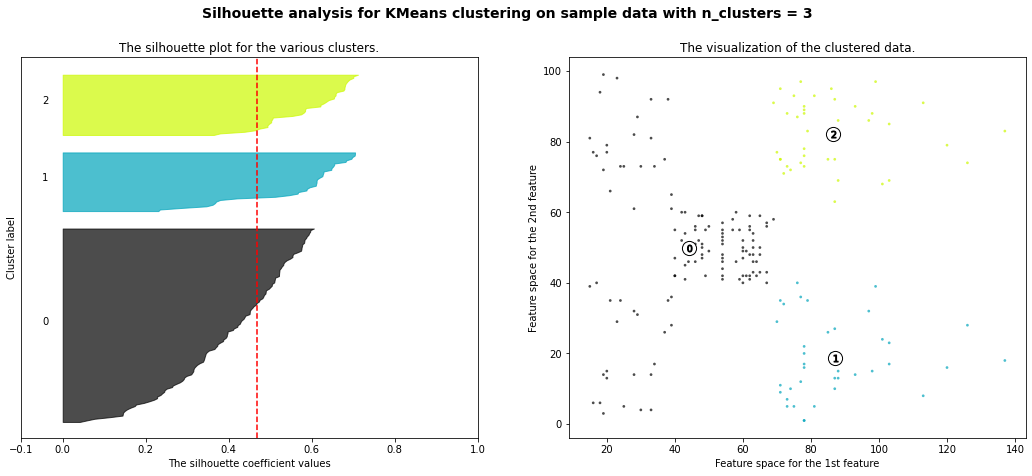

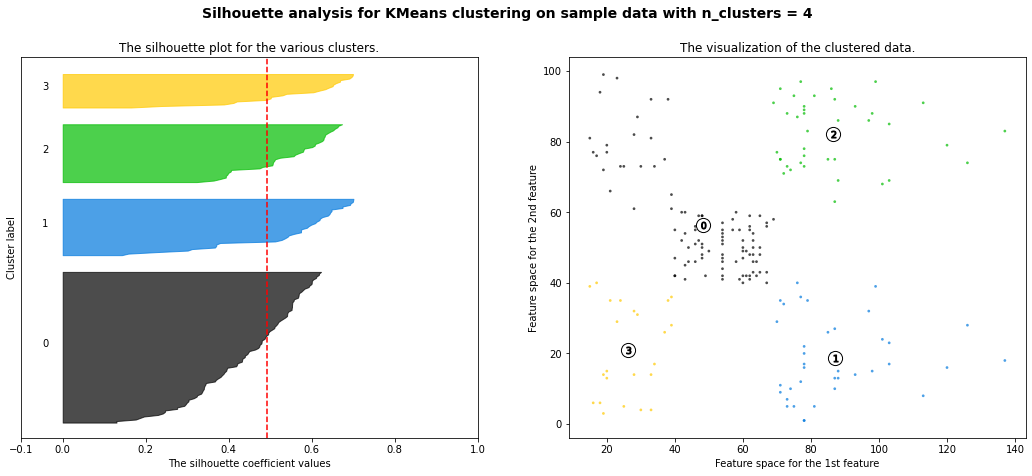

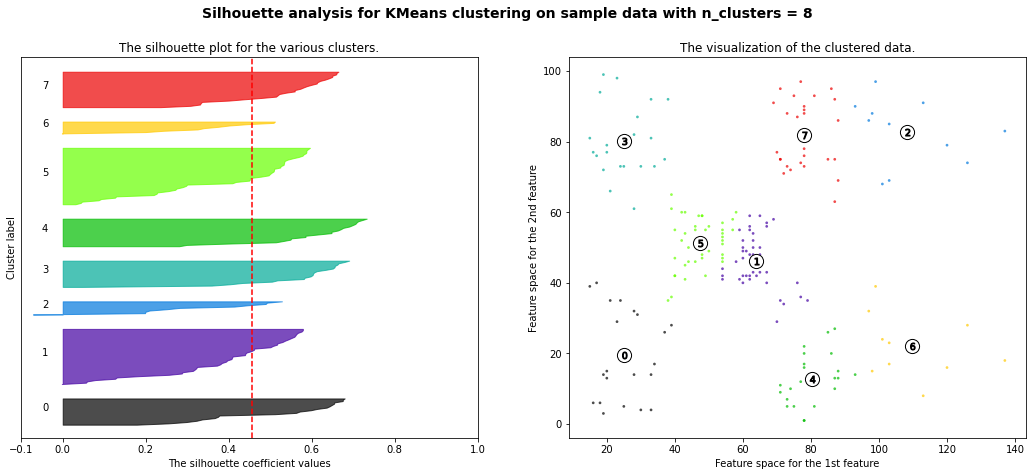

In [23]:
# plot silhouette coefficient method graph
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed closetogether.
X, y = make_blobs(n_samples=500,
                 n_features=2,
                 centers=4,
                 cluster_std=1,
                 center_box=(-10.0, 10.0),
                 shuffle=True,
                 random_state=1)  

range_n_clusters = [2, 3, 4, 5, 6,7,8]
X=mc.iloc[:, [3,4]].values
for n_clusters in range_n_clusters:
   # Create a subplot with 1 row and 2 columns
   fig, (ax1, ax2) = plt.subplots(1, 2)
   fig.set_size_inches(18, 7)

   # The 1st subplot is the silhouette plot.
   # The silhouette coefficient range, -0.1, 1
   ax1.set_xlim([-0.1, 1])
    
   # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
   ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

   # Initialize the cluster with n_clusters value and a random generator seed of 10.
   cluster = KMeans(n_clusters=n_clusters, random_state=10)
   cluster_labels = cluster.fit_predict(X)

   # The silhouette_score gives the average value for all the samples.
   silhouette_avg = silhouette_score(X, cluster_labels)
   print("For n_clusters =", n_clusters,
         "The average silhouette_score is :", silhouette_avg)

   # Compute the silhouette scores for each sample
   sample_silhouette_values = silhouette_samples(X, cluster_labels)

   y_lower = 10
   for i in range(n_clusters):
       # Aggregate the silhouette scores for samples belonging to cluster i and sort them
       ith_cluster_silhouette_values = \
           sample_silhouette_values[cluster_labels == i]

       ith_cluster_silhouette_values.sort()

       size_cluster_i = ith_cluster_silhouette_values.shape[0]
       y_upper = y_lower + size_cluster_i

       color = cm.nipy_spectral(float(i) / n_clusters)
       ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

       # Label the silhouette plots with their cluster numbers at the middle
       ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

       # Compute the new y_lower for next plot
       y_lower = y_upper + 10  

   ax1.set_title("The silhouette plot for the various clusters.")
   ax1.set_xlabel("The silhouette coefficient values")
   ax1.set_ylabel("Cluster label")

   # The vertical line for average silhouette score of all the values
   ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

   ax1.set_yticks([])  
   ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   # 2nd Plot showing the actual clusters formed
   colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
   ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
               c=colors, edgecolor='k')

   # Labeling the clusters
   centers = cluster.cluster_centers_
   # Draw white circles at cluster centers
   ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
               c="white", alpha=1, s=200, edgecolor='k')

   for i, c in enumerate(centers):
       ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                   s=50, edgecolor='k')

   ax2.set_title("The visualization of the clustered data.")
   ax2.set_xlabel("Feature space for the 1st feature")
   ax2.set_ylabel("Feature space for the 2nd feature")
   plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                 "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')
plt.show()


# Build hierarchical  Model

**using dendrogram method**

In [24]:
# plot the dendrogram 
import scipy.cluster.hierarchy as sch

In [25]:
# make a dendrogram using ward method 
plt.figure(figsize=(10, 7)) 
plt.title("Dendrograms") 
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=6, color='r', linestyle='--')


In [26]:
# import the agglomerative/hierarchical cluster from scikit learn 
from sklearn.cluster import AgglomerativeClustering

In [27]:
# init the model
hc= AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [28]:
# fit and predict 
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

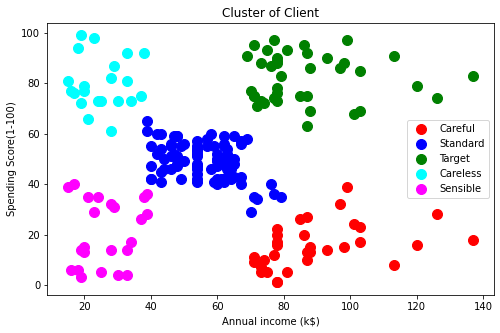

In [29]:
# Visualizing the  Cluster - Hierarchical
plt.figure(figsize = (8,5))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label = 'Sensible')

plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()


In [30]:
#Assign each customer to cluster group
from pandas import Series, DataFrame
mc['cluster group'] = Series(y_hc, index=mc.index)
mc.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster group  
0              4  
1              3  
2              4  
3              3  
4              4

In [31]:
# print number of instances in each cluster group
mc['cluster group'].value_counts()


1    85
2    39
0    32
4    23
3    21
Name: cluster group, dtype: int64